# **Project Title: Crime Data Analysis (Baltimore)**

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Introduction**

**Description:** In this project, we aim to analyze crime trends in specific neighborhoods for the years 2017 and 2024, focusing on identifying neighborhoods with significant increases or decreases in crime counts across selected crime types.

**Objective:** To provide insights on crime patterns for decision-making by analyzing the most and least affected neighborhoods over these years.

# **Data Loading and Overview**

Step:
Import the necessary libraries and load the dataset and get a basic overview of its structure.

Code Description:
Load the dataset into a DataFrame, display the first few rows, and examine the data types and summary statistics to understand the initial structure and contents of the data.

In [101]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Project1_dataset/Data_project.csv', low_memory=False)

# Display the first few rows of the dataset
data.head()

,RowID,CCNumber,CrimeDateTime,CrimeCode,Description,Inside_Outside,Weapon,Post,Gender,Age,...,Old_District,New_District,Neighborhood,Latitude,Longitude,GeoLocation,PremiseType,Total_Incidents,x,y
0,14247,24K04560,11/15/2024 9:00:00 AM,3A,ROBBERY,O,NaN,731,M,10.0,...,NaN,WESTERN,MONDAWMIN,39.312352,-76.655762,"(39.312352,-76.655762)",STREET ...,1,-76.655762,39.312352
1,14248,24K05551,11/15/2024 3:00:00 PM,6J,LARCENY,I,NaN,932,M,69.0,...,NaN,SOUTHERN,WASHINGTON VILLAGE/PIGTOWN,39.285870,-76.630388,"(39.28587,-76.630388)",OTHER/RESIDENTIAL ...,1,-76.630388,39.285870
2,14249,24K05535,11/15/2024 5:00:00 PM,6G,LARCENY,O,NaN,613,M,48.0,...,NaN,NORTHWEST,WALBROOK,39.314377,-76.666460,"(39.314377,-76.66646)",STREET ...,1,-76.666460,39.314377
3,14280,24K04517,11/15/2024 7:10:00 AM,4A,AGG. ASSAULT,I,PERSONAL_WEAPONS,125,F,28.0,...,NaN,CENTRAL,GAY STREET,39.303671,-76.596618,"(39.303671,-76.596618)",OTHER/RESIDENTIAL ...,1,-76.596618,39.303671
4,14281,24K04522,11/15/2024 4:15:00 AM,6F,LARCENY FROM AUTO,O,NaN,731,F,62.0,...,NaN,WESTERN,MONDAWMIN,39.310501,-76.654084,"(39.310501,-76.654084)",STREET ...,1,-76.654084,39.310501


In [102]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353276 entries, 0 to 353275
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            353276 non-null  int64  
 1   CCNumber         353276 non-null  object 
 2   CrimeDateTime    353276 non-null  object 
 3   CrimeCode        353276 non-null  object 
 4   Description      353276 non-null  object 
 5   Inside_Outside   40398 non-null   object 
 6   Weapon           116271 non-null  object 
 7   Post             349694 non-null  object 
 8   Gender           289830 non-null  object 
 9   Age              286448 non-null  float64
 10  Race             321727 non-null  object 
 11  Ethnicity        113391 non-null  object 
 12  Location         351047 non-null  object 
 13  Old_District     283528 non-null  object 
 14  New_District     66249 non-null   object 
 15  Neighborhood     348954 non-null  object 
 16  Latitude         352719 non-null  floa

In [103]:
# Check the shape of the data
data.shape

(353276, 23)

In [104]:
# Check basic statistics for numerical columns
data.describe()

,RowID,Age,Latitude,Longitude,Total_Incidents,x,y
count,353276.000000,286448.000000,352719.000000,352719.000000,353276.0,352719.000000,352719.000000
mean,310559.887870,37.807609,38.971695,-75.967189,1.0,-75.967189,38.971695
std,111228.685341,41.543749,3.624057,7.033975,0.0,7.033975,3.624057
min,14247.000000,-7979.000000,-76.657031,-76.728558,1.0,-76.728558,-76.657031
25%,224106.750000,26.000000,39.287347,-76.649404,1.0,-76.649404,39.287347
50%,313443.500000,35.000000,39.301684,-76.613982,1.0,-76.613982,39.301684
75%,401762.250000,48.000000,39.325895,-76.586313,1.0,-76.586313,39.325895
max,572986.000000,7070.000000,39.375381,39.285097,1.0,39.285097,39.375381


In [105]:
# Drop unnecessary columns
columns_to_drop = [
    'RowID', 'CCNumber', 'CrimeCode', 'Inside_Outside', 'Weapon', 'Post',
    'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'Old_District',
    'New_District', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType',
    'x', 'y'
]

# Drop the columns directly from the original DataFrame using inplace=True
data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the cleaned data
data.head()

,CrimeDateTime,Description,Neighborhood,Total_Incidents
0,11/15/2024 9:00:00 AM,ROBBERY,MONDAWMIN,1
1,11/15/2024 3:00:00 PM,LARCENY,WASHINGTON VILLAGE/PIGTOWN,1
2,11/15/2024 5:00:00 PM,LARCENY,WALBROOK,1
3,11/15/2024 7:10:00 AM,AGG. ASSAULT,GAY STREET,1
4,11/15/2024 4:15:00 AM,LARCENY FROM AUTO,MONDAWMIN,1


In [106]:
#Check unique values in Neighborhood and Description columns
print("Unique Neighborhoods:", data['Neighborhood'].nunique())
print("Unique Crime Descriptions:", data['Description'].unique())

Unique Neighborhoods: 290
Unique Crime Descriptions: ['ROBBERY' 'LARCENY' 'AGG. ASSAULT' 'LARCENY FROM AUTO' 'COMMON ASSAULT'
 'BURGLARY' 'SHOOTING' 'AUTO THEFT' 'ROBBERY - CARJACKING' 'ARSON'
 'ROBBERY - COMMERCIAL' 'RAPE' 'HOMICIDE']


# **Data Cleaning**

**a) Convert CrimeDateTime to datetime format and extract CrimeYear**

In [107]:
# Convert 'CrimeDateTime' to datetime format
data['CrimeDateTime'] = pd.to_datetime(data['CrimeDateTime'])

# Extract the year from 'CrimeDateTime' and create a new column 'CrimeYear'
data['CrimeYear'] = data['CrimeDateTime'].dt.year

# Drop the original 'CrimeDateTime' column
data.drop(columns=['CrimeDateTime'], inplace=True)

# Display the first few rows of the cleaned data
data.head()


,Description,Neighborhood,Total_Incidents,CrimeYear
0,ROBBERY,MONDAWMIN,1,2024
1,LARCENY,WASHINGTON VILLAGE/PIGTOWN,1,2024
2,LARCENY,WALBROOK,1,2024
3,AGG. ASSAULT,GAY STREET,1,2024
4,LARCENY FROM AUTO,MONDAWMIN,1,2024


**b) Filter for 2017 and 2024 Data**



In [108]:
# Filter the dataset to only include records from 2017 and 2024
data = data[data['CrimeYear'].isin([2017, 2024])]
data['CrimeYear'].unique()


array([2024, 2017], dtype=int32)

**c) Dropping Outlier Neighborhoods**

In [109]:
# Filter for relevant crime types (homicide, shooting, agg.assault)
violent_crime_types = ['HOMICIDE', 'SHOOTING', 'AGG. ASSAULT']
filtered_data = data[data['Description'].isin(violent_crime_types)]

# Filter data for the years 2017 and 2024
filtered_data = filtered_data[filtered_data['CrimeYear'].isin([2017, 2024])]

# Display cleaned data
print(filtered_data.head())

     Description    Neighborhood  Total_Incidents  CrimeYear
3   AGG. ASSAULT      GAY STREET                1       2024
20      SHOOTING          MOSHER                1       2024
21      SHOOTING       FRANKFORD                1       2024
25  AGG. ASSAULT  WINSTON-GOVANS                1       2024
26  AGG. ASSAULT        WESTPORT                1       2024


In [110]:
# Count the number of zero incidents for each neighborhood per year
zero_counts = filtered_data[filtered_data['Total_Incidents'] == 0].groupby('Neighborhood')['CrimeYear'].count()

# Identify neighborhoods with zero counts for three or more crime types
neighborhoods_to_remove = zero_counts[zero_counts >= 3].index

# Remove those neighborhoods from the analysis
filtered_data = filtered_data[~filtered_data['Neighborhood'].isin(neighborhoods_to_remove)]

# Display filtered data
print(filtered_data.head())

     Description    Neighborhood  Total_Incidents  CrimeYear
3   AGG. ASSAULT      GAY STREET                1       2024
20      SHOOTING          MOSHER                1       2024
21      SHOOTING       FRANKFORD                1       2024
25  AGG. ASSAULT  WINSTON-GOVANS                1       2024
26  AGG. ASSAULT        WESTPORT                1       2024


# **Citywide Total Crime Comparison**

Calculate the total crime counts for the city in 2017 and 2024 and determine the percentage change.

In [111]:
city_totals = filtered_data[filtered_data['CrimeYear'].isin([2017, 2024])]

# Calculate total incidents for 2017 and 2024
city_total_2017 = city_totals[city_totals['CrimeYear'] == 2017]['Total_Incidents'].sum()
city_total_2024 = city_totals[city_totals['CrimeYear'] == 2024]['Total_Incidents'].sum()

# Calculate the percentage change
city_percentage_change = ((city_total_2024 - city_total_2017) / city_total_2017) * 100

# Display the results
print(f"Total Crime Counts in 2017: {city_total_2017}")
print(f"Total Crime Counts in 2024: {city_total_2024}")
print(f"Percentage Change in Total Crime: {city_percentage_change:.2f}%")


Total Crime Counts in 2017: 6905
Total Crime Counts in 2024: 5451
Percentage Change in Total Crime: -21.06%


# **Neighborhood-Level Analysis**
Calculate and compare the percentage change in crime for each neighborhood.

In [112]:
# Group data by Neighborhood and CrimeYear, summing the total incidents
grouped_data = data.groupby(['Neighborhood', 'CrimeYear'])['Total_Incidents'].sum().unstack()

# Ensure both years (2017, 2024) are present, fill missing values with 0
grouped_data = grouped_data.reindex(columns=[2017, 2024], fill_value=0)

# Calculate percentage change
percentage_change = ((grouped_data[2024] - grouped_data[2017]) / grouped_data[2017].replace(0, np.nan)) * 100

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Neighborhood': grouped_data.index,
    'Total_Incidents_2017': grouped_data[2017].values,
    'Total_Incidents_2024': grouped_data[2024].values,
    'Percentage_Change': percentage_change.values
})

# Sort results to identify neighborhoods with the highest increases and decreases
top_increases = results_df.sort_values(by='Percentage_Change', ascending=False).head(5)
top_decreases = results_df.sort_values(by='Percentage_Change', ascending=True).head(5)

# Display the results in table format
print("\nTop 5 Neighborhoods with the Highest Increase in Crime:")
print(top_increases.to_string(index=False))

print("\nTop 5 Neighborhoods with the Highest Decrease in Crime:")
print(top_decreases.to_string(index=False))



Top 5 Neighborhoods with the Highest Increase in Crime:
       Neighborhood  Total_Incidents_2017  Total_Incidents_2024  Percentage_Change
     PORT COVINGTON                   4.0                  12.0         200.000000
GREENMOUNT CEMETERY                   2.0                   5.0         150.000000
           EASTWOOD                  12.0                  27.0         125.000000
        FOREST PARK                  96.0                 209.0         117.708333
         CEDARCROFT                  29.0                  44.0          51.724138

Top 5 Neighborhoods with the Highest Decrease in Crime:
          Neighborhood  Total_Incidents_2017  Total_Incidents_2024  Percentage_Change
         PERKINS HOMES                 112.0                   6.0         -94.642857
          THE ORCHARDS                  10.0                   2.0         -80.000000
           MORGAN PARK                  22.0                   5.0         -77.272727
LOWER HERRING RUN PARK                   8.0

# **Visualization**
Use bar charts to display citywide changes and neighborhood-level changes.

In [113]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

**City Wide Analysis**

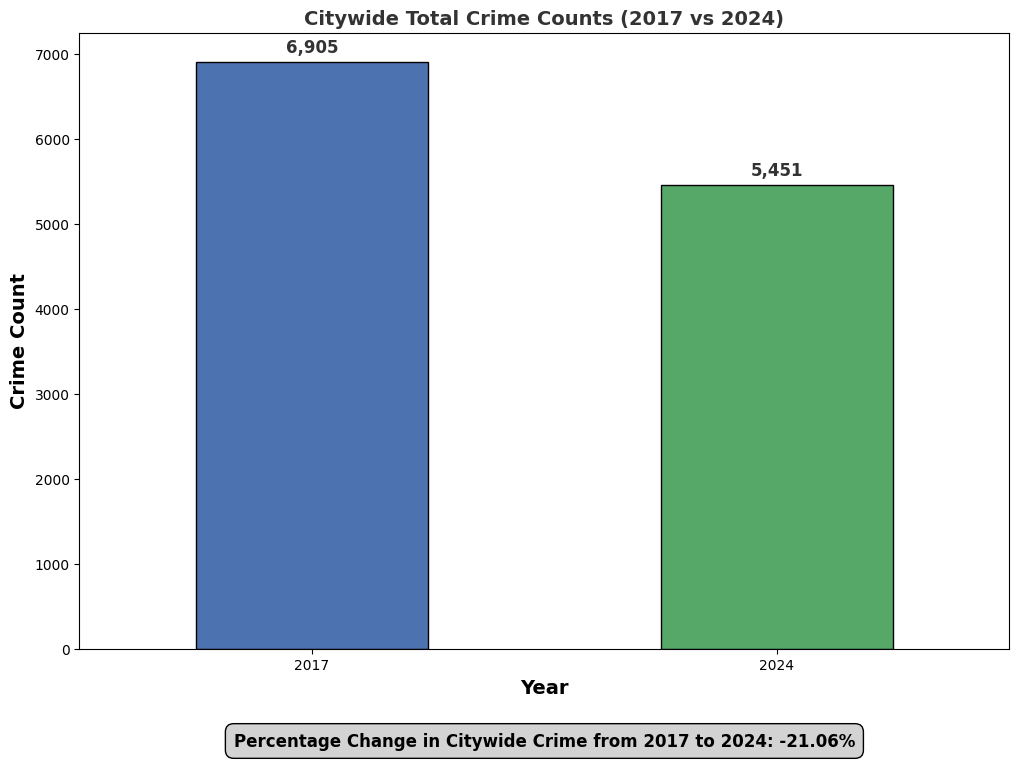

In [114]:
# Data filtering and computations
city_totals = filtered_data[filtered_data['CrimeYear'].isin([2017, 2024])]
city_total_2017 = city_totals[city_totals['CrimeYear'] == 2017]['Total_Incidents'].sum()
city_total_2024 = city_totals[city_totals['CrimeYear'] == 2024]['Total_Incidents'].sum()

# Calculate percentage change
if city_total_2017 != 0:
    city_percentage_change = ((city_total_2024 - city_total_2017) / city_total_2017) * 100
else:
    city_percentage_change = 0

# Prepare citywide counts for visualization
citywide_counts = {2017: city_total_2017, 2024: city_total_2024}

# Visualization
plt.figure(figsize=(12, 8))
colors = ["#4C72B0", "#55A868"]

# Convert dictionary to Series for plotting
citywide_counts_series = pd.Series(citywide_counts)

# Plot the bar graph
citywide_counts_series.plot(kind='bar', color=colors, edgecolor='black')

# Set title and labels with styling
plt.title("Citywide Total Crime Counts (2017 vs 2024)", fontsize=14, fontweight='bold', color="#333333")
plt.xlabel("Year", fontsize=14, fontweight='bold')
plt.ylabel("Crime Count", fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adding data labels with proper alignment
for i, value in enumerate(citywide_counts_series):
    plt.text(i, value + max(citywide_counts_series) * 0.01,
             f"{value:,.0f}", ha='center', va='bottom', fontsize=12, color="#333333", fontweight='bold')

# Add the percentage change as a text box within the plot
percent_text = f"Percentage Change in Citywide Crime from 2017 to 2024: {city_percentage_change:.2f}%"
plt.text(0.5, -0.15, percent_text, ha='center', va='center',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(facecolor='lightgrey', edgecolor='black', boxstyle='round,pad=0.5'))

# Show the plot
plt.show()


**Neighborhood-level Analysis**

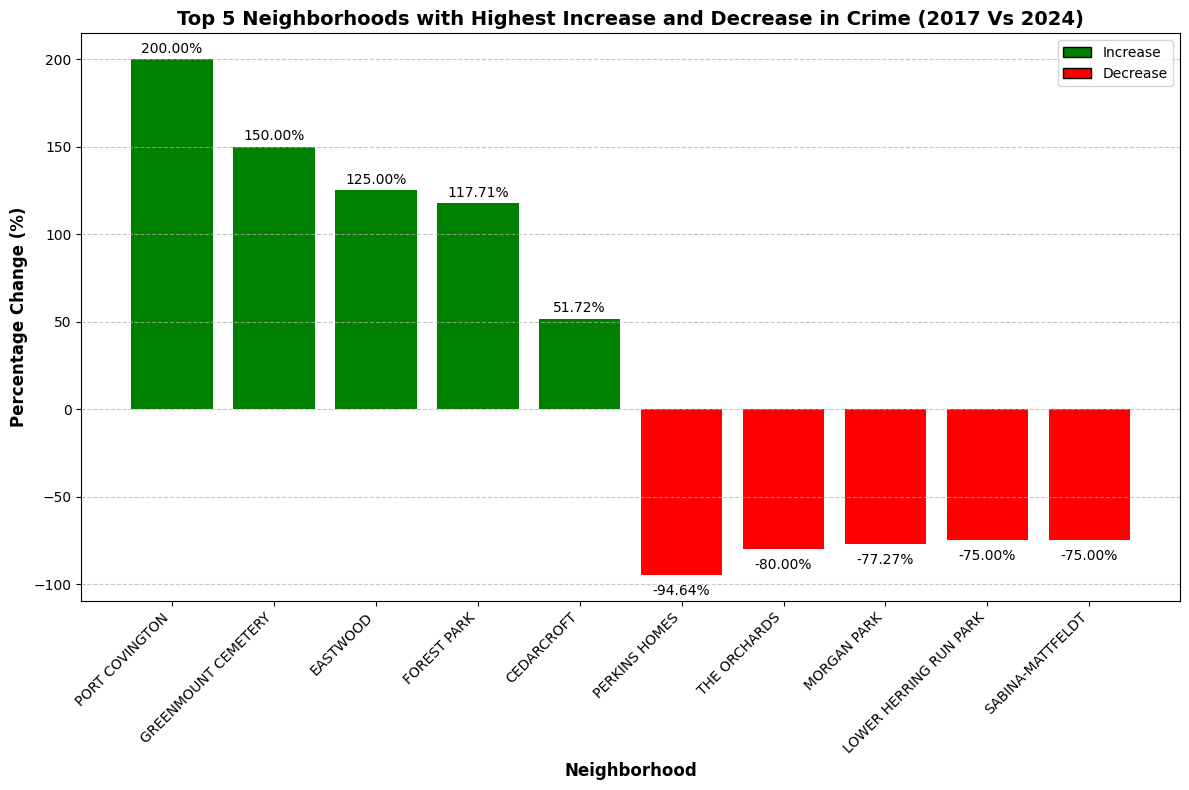

In [115]:
# Combine top increases and decreases for visualization
combined_data = pd.concat([top_increases, top_decreases], axis=0)

# Set up bar colors: increases in green, decreases in red
bar_colors = ['green'] * len(top_increases) + ['red'] * len(top_decreases)

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(combined_data['Neighborhood'], combined_data['Percentage_Change'], color=bar_colors)

# Add percentage change values inside the bars
for bar, value in zip(bars, combined_data['Percentage_Change']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        height + (2 if height > 0 else -5),  # y-coordinate, offset slightly above or below the bar
        f"{value:.2f}%",  # formatted percentage value
        ha='center',  # horizontal alignment
        va='bottom' if height > 0 else 'top',  # vertical alignment
        fontsize=10
    )

# Add title and labels
plt.title("Top 5 Neighborhoods with Highest Increase and Decrease in Crime (2017 Vs 2024)", fontsize=14, fontweight='bold')
plt.xlabel("Neighborhood", fontsize=12, fontweight='bold')
plt.ylabel("Percentage Change (%)", fontsize=12, fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend manually using Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Increase'),
    Patch(facecolor='red', edgecolor='black', label='Decrease')
]
plt.legend(handles=legend_elements, loc='upper right')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
